###Librerias e Importacipon Datasets



In [ ]:
# Main imports
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
_2022_=pd.read_excel('CDI x BDI Tentpoles.xlsx',sheet_name=1)
_2022_=pd.DataFrame(_2022_)

In [ ]:
_2019_=pd.read_excel('CDI x BDI Tentpoles.xlsx')
_2019_=pd.DataFrame(_2019_)

###Comparación

In [ ]:

import matplotlib.pyplot as plt


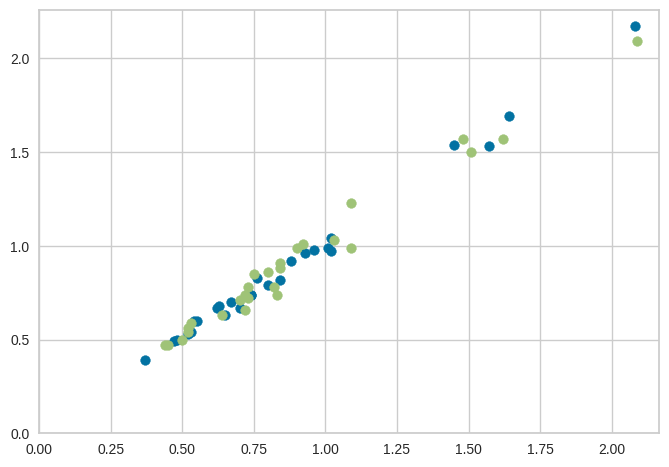

In [ ]:
y = np.array(_2019_['BDI'])
x = np.array(_2019_['CDI'])
plt.scatter(x, y)
# for i, label in enumerate(_2019_['State']):
#     plt.annotate(label, (_2019_['CDI'][i], _2019_['BDI'][i])
    # , fontsize=15,
                #  ha='right', va='bottom', textcoords='offset points', xytext=(14, 10)
                # )
plt.xlim(0)   #----->escala de cada eje
plt.ylim(0)


y = np.array(_2022_['BDI'])
x = np.array(_2022_['CDI'])
plt.scatter(x, y)
plt.xlim(0)
plt.ylim(0)

plt.show()

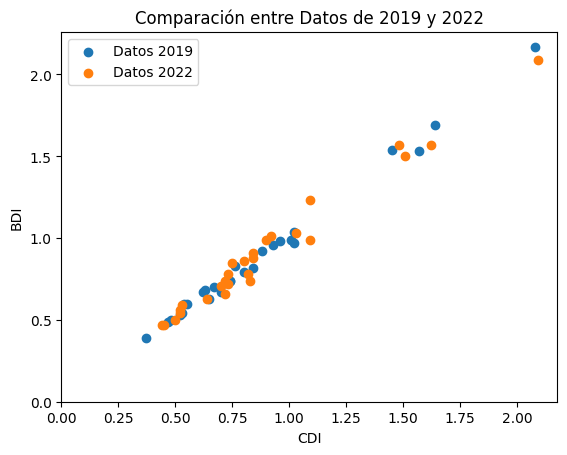

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que '_2019_' y '_2022_' son DataFrames de Pandas

# Crear el gráfico de dispersión para 2019
plt.scatter(_2019_['CDI'], _2019_['BDI'], label='Datos 2019')

# Crear el gráfico de dispersión para 2022
plt.scatter(_2022_['CDI'], _2022_['BDI'], label='Datos 2022')

# Ajustar los límites de los ejes para empezar desde 0
plt.xlim(0)
plt.ylim(0)

# Añadir etiquetas a los ejes
plt.xlabel('CDI')
plt.ylabel('BDI')
plt.title('Comparación entre Datos de 2019 y 2022')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


###Kmeans 2022

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [ ]:
#CUANDO NO SE CUNTOS CLUSTER Y TENGO QUE SACAR INERTIAS PARA EL CODO

K = range(1, 10)
inertias = []  #esta variable para luego graficar el codo

for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    kmeanModel.fit(_2022_[['BDI','CDI']])
    inertias.append(kmeanModel.inertia_)



In [ ]:
# Crear y ajustar el modelo KMeans con 5 clusters
kmeanModel = KMeans(n_clusters=5, init='k-means++', n_init=1, max_iter=100, random_state=42)
kmeanModel.fit(_2022_[['BDI', 'CDI']])


KMeans(max_iter=100, n_clusters=5, n_init=1, random_state=42)

In [ ]:
# Obtener los resultados
centros = kmeanModel.cluster_centers_
inercia = kmeanModel.inertia_
etiquetas = kmeanModel.labels_
print(' inercia:\n',inercia)
print('\n etiquetas:\n',etiquetas)
print('\n centros:\n',centros)

 inercia:
 0.23173125541125544

 etiquetas:
 [1 1 4 2 4 2 0 4 3 4 4 0 2 2 0 4 0 4 4 0 4 0 4 1 0 2 4]

 centros:
 [[0.53714286 0.51428571]
 [1.54666667 1.53666667]
 [1.05       1.006     ]
 [2.09       2.09      ]
 [0.78454545 0.77090909]]


In [ ]:
_2022_['CLUSTERS']=etiquetas
_2022_['CLUSTERS'].value_counts()

4    11
0     7
2     5
1     3
3     1
Name: CLUSTERS, dtype: int64

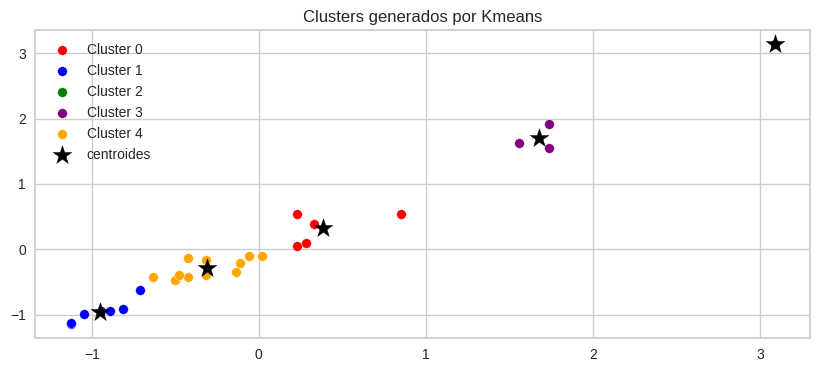

In [ ]:
# Representación gráfica:

color = ['red', 'blue', 'green', 'purple', 'orange']
X_scaled = scale(_2022_[['BDI','CDI']])
modelo_kmeans = KMeans(n_clusters=5, n_init=10, random_state=123)
modelo_kmeans.fit(X=X_scaled)

fig, ax = plt.subplots(figsize=(10, 4))

y_predict = modelo_kmeans.predict(X=X_scaled)

for i in np.unique(y_predict):
    ax.scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1],
        c = color[i],#plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'white',
        label= f"Cluster {i}"
    )

ax.scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax.set_title('Clusters generados por Kmeans')
ax.legend();

<ipython-input-134-bfb33b15a161>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(K, inertias, 'bx-', marker='o')


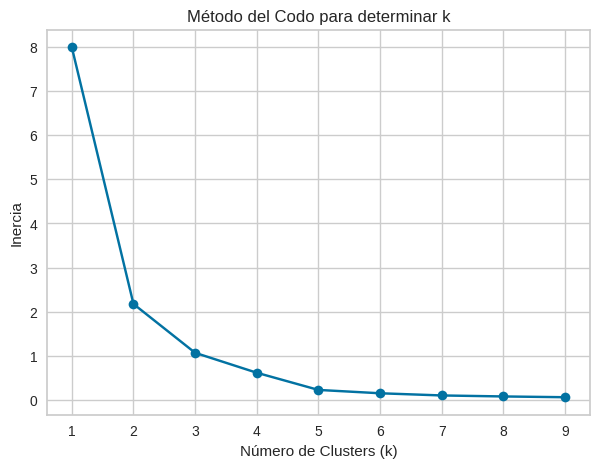

In [ ]:
# Graficar la curva del codo
plt.subplots(figsize=(7, 5))
plt.plot(K, inertias, 'bx-', marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k')
plt.show()


In [ ]:
_2022_[_2022_['CLUSTERS']==0].value_counts().sum()

7

In [ ]:
# Ordenar por la columna 'A'
_2022_=_2022_.sort_values(by='CLUSTERS')

In [ ]:
_2022_['CLUSTERS'].value_counts()  #esta bien la distribucion pero con diferente numero de clusters

4    11
0     7
2     5
1     3
3     1
Name: CLUSTERS, dtype: int64

In [ ]:
# Actualizar los valores de 'CLUSTERS' a 1 cuando 'CLUSTERS' es igual a 0
_2022_.loc[_2022_['CLUSTERS'] == 0, 'CLUSTERS'] = 1

In [ ]:
estados_cluster_0 = _2022_.loc[_2022_['CLUSTERS'] == 0, 'State']
estados_cluster_0

6     BA
11    PA
14    MA
16    RN
19    PB
21    PI
24    TO
Name: State, dtype: object

In [ ]:
_2022_[_2022_['CLUSTERS'] == 0]['State']

6     BA
11    PA
14    MA
16    RN
19    PB
21    PI
24    TO
Name: State, dtype: object

In [ ]:
# Asignaciones usando mask
_2022_['CLUSTERS'] = _2022_['CLUSTERS'].mask((_2022_['CLUSTERS'] == 0) & (_2022_['otra_condicion'] == 'algo'), 3)
_2022_['CLUSTERS'] = _2022_['CLUSTERS'].mask((_2022_['CLUSTERS'] == 1) & (_2022_['otra_condicion'] == 'otra_cosa'), 5)
_2022_['CLUSTERS'] = _2022_['CLUSTERS'].mask((_2022_['CLUSTERS'] == 3) & (_2022_['otra_condicion'] == 'algo_mas'), 4)
_2022_['CLUSTERS'] = _2022_['CLUSTERS'].mask((_2022_['CLUSTERS'] == 4) & (_2022_['otra_condicion'] == 'nueva_condicion'), 1)


In [ ]:
_2022_[_2022_['CLUSTERS']==0]=3 | _2022_[_2022_['CLUSTERS']==1]=5 | _2022_[_2022_['CLUSTERS']==3]=4 | _2022_[_2022_['CLUSTERS']==4]=1
_2022_

,State,BDI,CDI,CLUSTERS
0,5,5.00,5.00,5
1,5,5.00,5.00,5
2,5,5.00,5.00,5
3,PR,1.03,1.03,2
4,5,5.00,5.00,5
5,SC,0.99,1.09,2
6,5,5.00,5.00,5
7,5,5.00,5.00,5
8,5,5.00,5.00,5
9,5,5.00,5.00,5


###2019


In [ ]:
#2019
_2019_

,State,BDI,CDI
0,SP,1.53,1.57
1,RJ,1.69,1.64
2,MG,0.67,0.70
3,PR,0.97,1.02
4,RS,0.82,0.84
5,SC,0.99,1.01
6,BA,0.50,0.48
7,PE,0.83,0.76
8,DF,2.17,2.08
9,CE,0.70,0.67


In [ ]:
#CUANDO NO SE CUNTOS CLUSTER Y TENGO QUE SACAR INERTIAS PARA EL CODO

K = range(1, 10)
inertias = []  #esta variable para luego graficar el codo

for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    kmeanModel.fit(_2019_[['BDI','CDI']])
    inertias.append(kmeanModel.inertia_)



<ipython-input-46-bfb33b15a161>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(K, inertias, 'bx-', marker='o')


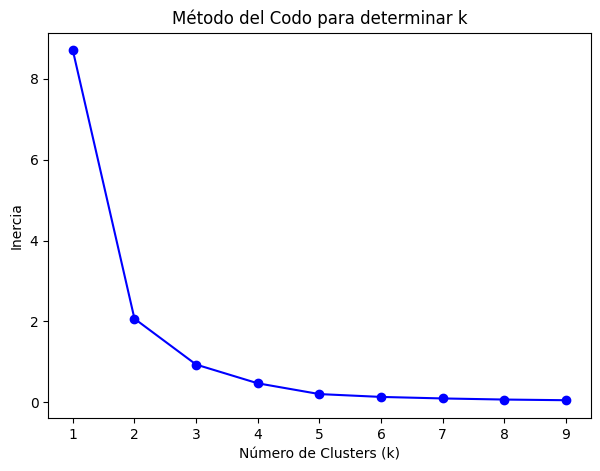

In [ ]:
# Graficar la curva del codo
plt.subplots(figsize=(7, 5))
plt.plot(K, inertias, 'bx-', marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k')
plt.show()


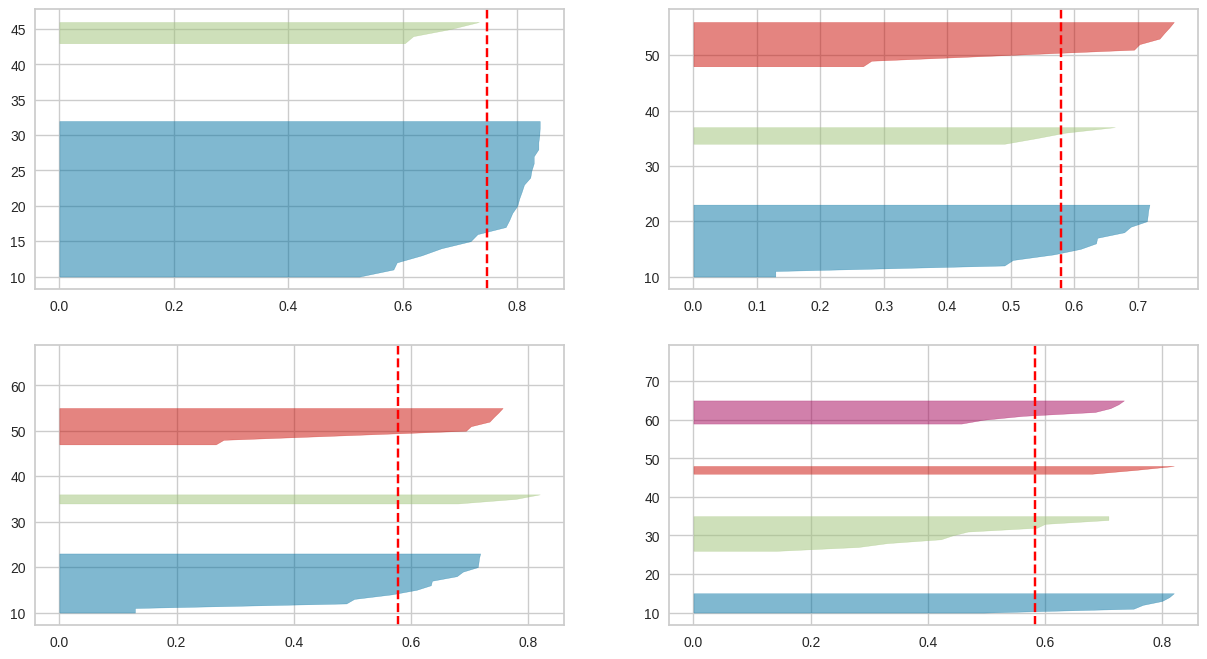

In [ ]:

#Implementacion de Silouette para otra forma de sacar los clusters
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(_2019_[['BDI', 'CDI']])

    # 0.7  medida que te da siloutte para que un cluster sea bueno
    # hay que los que son de similares caracteristicas

In [ ]:
# Crear y ajustar el modelo KMeans con 5 clusters
kmeanModel = KMeans(n_clusters=4, init='k-means++', n_init=1, max_iter=100, random_state=42)
kmeanModel.fit(_2019_[['BDI', 'CDI']])


KMeans(max_iter=100, n_clusters=4, n_init=1, random_state=42)

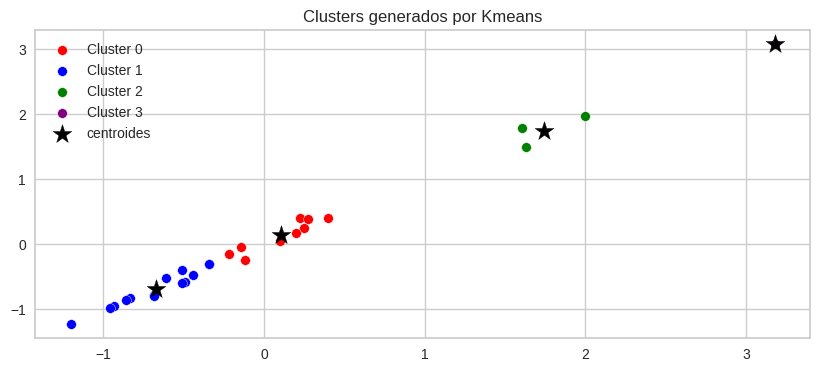

In [ ]:
# Representación gráfica:

color = ['red', 'blue', 'green', 'purple']
X_scaled = scale(_2019_[['BDI','CDI']])
modelo_kmeans = KMeans(n_clusters=4, n_init=10, random_state=123)
modelo_kmeans.fit(X=X_scaled)

fig, ax = plt.subplots(figsize=(10, 4))

y_predict = modelo_kmeans.predict(X=X_scaled)

for i in np.unique(y_predict):
    ax.scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1],
        c = color[i],#plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'white',
        label= f"Cluster {i}"
    )

ax.scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax.set_title('Clusters generados por Kmeans')
ax.legend();

In [ ]:
# Obtener los resultados
centros = kmeanModel.cluster_centers_
inercia = kmeanModel.inertia_
etiquetas = kmeanModel.labels_
print(' inercia:\n',inercia)
print('\n etiquetas:\n',etiquetas)
print('\n centros:\n',centros)

 inercia:
 0.6680254761904763

 etiquetas:
 [1 1 3 2 3 2 0 3 1 3 3 0 2 2 0 2 3 3 0 0 3 0 3 1 0 2 3]

 centros:
 [[0.52142857 0.49428571]
 [1.7325     1.685     ]
 [0.97666667 0.97      ]
 [0.727      0.715     ]]


In [ ]:
_2019_['Clusters']=etiquetas

In [ ]:
_2019_

,State,BDI,CDI,Clusters
0,SP,1.53,1.57,1
1,RJ,1.69,1.64,1
2,MG,0.67,0.70,3
3,PR,0.97,1.02,2
4,RS,0.82,0.84,3
5,SC,0.99,1.01,2
6,BA,0.50,0.48,0
7,PE,0.83,0.76,3
8,DF,2.17,2.08,1
9,CE,0.70,0.67,3


In [ ]:
import pandas as pd

# DataFrames que deseas guardar
# data1 = {'Columna1': [1, 2, 3], 'Columna2': [4, 5, 6]}
# data2 = {'OtraColumna1': [7, 8, 9], 'OtraColumna2': [10, 11, 12]}
# df1 = pd.DataFrame(data1)
# df2 = pd.DataFrame(data2)
# Guardar DataFrames en el archivo Excel con nombres de hojas diferentes
archivo_excel = 'CDIxBDI_Clusters.xlsx'
nombre_hoja1 = '2019'
nombre_hoja2 = '2022'

with pd.ExcelWriter(archivo_excel, engine='openpyxl') as writer:
    _2019_.to_excel(writer, sheet_name=nombre_hoja1, index=False)
    _2022_.to_excel(writer, sheet_name=nombre_hoja2, index=False)


# Descargar el archivo Excel
from google.colab import files
files.download(archivo_excel)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>